In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import pickle
from sklearn.decomposition import NMF
from surprise import SVD

In [22]:
df = pd.read_csv('./datasets/user_reviews.csv')

In [23]:
df = df[['user_id','item_id','sentiment_analysis']]
df

,user_id,item_id,sentiment_analysis
0,76561197970982479,1250,2
1,76561197970982479,22200,2
2,76561197970982479,43110,2
3,js41637,251610,2
4,js41637,227300,2
...,...,...,...
59300,76561198312638244,70,2
59301,76561198312638244,362890,2
59302,LydiaMorley,273110,2
59303,LydiaMorley,730,2


In [24]:
df1_by_users = df.groupby(['user_id']).count()
df1_by_users.head()

,item_id,sentiment_analysis
user_id,,
--000--,1,1
--ace--,2,2
--ionex--,2,2
-2SV-vuLB-Kg,5,5
-Azsael-,1,1


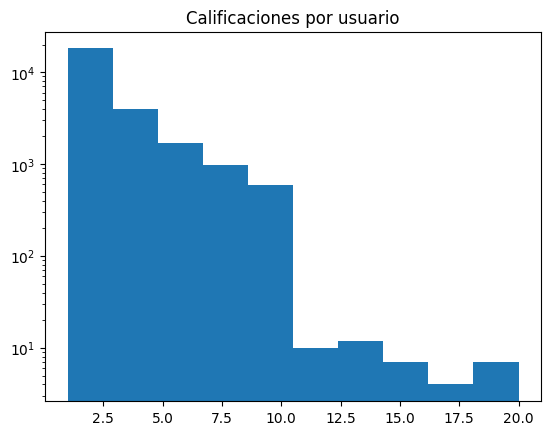

In [25]:

plt.hist(df1_by_users['sentiment_analysis'], log= True)
plt.title('Calificaciones por usuario')
plt.show()

In [26]:
df1_by_movies = df.groupby(['item_id']).count()
df1_by_movies.head()

,user_id,sentiment_analysis
item_id,,
10,57,57
20,17,17
30,4,4
40,1,1
50,4,4


In [8]:
from surprise import Dataset
from surprise import Reader

from surprise.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [27]:

reader = Reader()
label_encoder = LabelEncoder()
df['user_id_num'] = label_encoder.fit_transform(df['user_id'])
df_mod = df[['user_id_num','item_id','sentiment_analysis']]
data = Dataset.load_from_df(df_mod, reader)
trainset, testset = train_test_split(data, test_size=.25)
model = SVD()
model.fit(trainset)

predictions = model.test(testset)

In [35]:
user = 1231
user_id = label_encoder.fit_transform([user])
predictions = [model.predict(user, item_id) for item_id in user_reviews['item_id']]
recommendations = sorted(predictions, key=lambda x: x.est, reverse=True) # Obtén las mejores 5 recomendaciones
recommendations = pd.DataFrame(recommendations)
recommendations = recommendations.drop_duplicates(subset='iid')
df_steam = pd.read_csv('./datasets/steam_games.csv')
merge = pd.merge(df_steam[['app_name','id']],recommendations,left_on='id',right_on='iid',how='right')
merge[['app_name']].dropna()[:5]

,app_name
0,King Arthur's Gold
2,RimWorld
3,RIFT
4,The Wolf Among Us
5,Halo: Spartan Assault


In [30]:
def user_recommend(user:str):
    

    # Abrir y cargar el modelo SVD de archivos
    with open('./model/SVD_model.pkl', 'rb') as archivo:
        model = pickle.load(archivo)

    # Cargo las reseñas de usuarios 
    user_reviews = pd.read_csv('./datasets/user_reviews.csv',usecols=['user_id','item_id','sentiment_analysis'])

    # Cargo la lista de juegos de steam
    df_steam = pd.read_csv('./datasets/steam_games.csv')

    # Creo un label enconder para usuario
    label_encoder = LabelEncoder()
    user_id = label_encoder.fit_transform([user])

    # Predecir la puntuación del usuario para cada juego
    predictions = [model.predict(user, item_id) for item_id in user_reviews['item_id']]
    recommendations = sorted(predictions, key=lambda x: x.est, reverse=True) # Obtén las mejores 5 recomendaciones

    # Ordenar las predicciones en orden descendente de la estimación y recoger las primeras 5
    recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)

    # Convertir las recomendaciones en un DataFrame de pandas
    recommendations = pd.DataFrame(recommendations)

    # Eliminar duplicados basados en el id del juego
    recommendations = recommendations.drop_duplicates(subset='iid')

    # Mergeo la lista de juegos con las recomendaciones en base al id del juego
    merge = pd.merge(df_steam[['app_name','id']],recommendations,left_on='id',right_on='iid',how='right')

    rec = merge[['app_name']].dropna()[:5].values.tolist()

    # Retornar los juegos como un diccionario
    return {
        'Recomendacion 1 ': rec[0][0],
        'Recomendacion 2 ': rec[1][0],
        'Recomendacion 3 ': rec[2][0],
        'Recomendacion 4 ': rec[3][0],
        'Recomendacion 5 ': rec[4][0]
    }


In [31]:
user_recommend(1231)

{'Recomendacion 1 ': 'Gunpoint',
 'Recomendacion 2 ': "King Arthur's Gold",
 'Recomendacion 3 ': 'RIFT',
 'Recomendacion 4 ': 'Antichamber',
 'Recomendacion 5 ': 'Life is Feudal: Your Own'}